# Social Network Analysis - Amber Heard Case - Instagram
Adel Abu Hashim & Mahmoud Nagy - November 2021

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This case study aims to help **Amber Heard** <br>
> 
> By analyzing new accounts posting/ commenting against a victim of a Social Bot Disinformation/Influence Operation. 
> 
> **We have two main datasets**: <br>
>(The datasets screaped from **Instagram**).
> - 1- A dataset with posts data.
> - 2- A dataset with comments data.

In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import warnings
import re
import seaborn as sb
import re

warnings.filterwarnings("ignore")

import plotly.io as pio
from helpers import barh, pie, get_top, handler, isnull, bar, bar_peaks, draw_heatmap, facet_heat, facet_days, SameText

pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550

%matplotlib inline

In [2]:
os.chdir("../Data")

In [3]:
df_comments = pd.read_csv("comments_text.csv")
print(df_comments.shape)
df_comments.head()

(1434518, 18)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
0,#scarlettjohansson #alexandradaddario #emiliac...,2020-06-23 06:50:19,17915232430430980,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6,#scarlettjohansson #alexandradaddario #emiliac...,"{'emmastone', 'jessicaalba', 'gigihadid', 'sca..."
1,very beautiful 😘❤️❤️❤️i love you very much 😍💘💘...,2020-06-23 06:54:04,17889474637566402,0.0,0.0,2337634847974873088,n,12302008022,fr.ederic2368,False,https://www.instagram.com/fr.ederic2368,2020,Jun,23,2020-06-23,6,very beautiful i love you very much,"{'much', 'beautiful', 'love'}"
2,bombón bello 💖💖💖💖💖,2020-06-23 07:14:40,18066076495222844,0.0,0.0,2337634847974873088,n,1521544054,jorgero122129,False,https://www.instagram.com/jorgero122129,2020,Jun,23,2020-06-23,7,bombón bello,"{'bombón', 'bello'}"
3,stunning,2020-06-23 07:34:23,17859220648997344,0.0,0.0,2337634847974873088,n,4166540200,dexterisgod,False,https://www.instagram.com/dexterisgod,2020,Jun,23,2020-06-23,7,stunning,{'stunning'}
4,why are you so sweet?,2020-06-23 07:44:30,17889444721569168,0.0,0.0,2337634847974873088,n,8732111508,samuel_co_fer,False,https://www.instagram.com/samuel_co_fer,2020,Jun,23,2020-06-23,7,why are you so sweet?,{'sweet'}


In [4]:
df_comments["datetime"] = pd.to_datetime(df_comments["datetime"])
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434518 entries, 0 to 1434517
Data columns (total 18 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   message      1434518 non-null  object        
 1   datetime     1434518 non-null  datetime64[ns]
 2   id           1434518 non-null  int64         
 3   n_replies    1099438 non-null  float64       
 4   n_likes      1434518 non-null  float64       
 5   media_id     1434518 non-null  int64         
 6   parent_id    1434518 non-null  object        
 7   user_id      1434518 non-null  int64         
 8   username     1434518 non-null  object        
 9   is_verified  1434518 non-null  bool          
 10  account_url  1434518 non-null  object        
 11  year         1434518 non-null  int64         
 12  month        1434518 non-null  object        
 13  dayofmonth   1434518 non-null  int64         
 14  date         1434518 non-null  object        
 15  hour         14

In [ ]:
neg_dict = { 'kill': 4856,
 'kill her': 161,                   
 'kys': 147,
 'kill amber': 124,
 'kill yourself': 13,
 'she’s trying to kill him': 2,               
 'she should kys': 2,                   
 'go kys amber': 1,
                   
                   
 'death': 1799,
 ' death': 1256,
 'burn': 792,                   
 ' death ': 710,                   
 'deserves it': 178, 
 'burn in hell': 63,
 'go to hell': 105,                   
 'go die': 18, 
 'gotohell': 5,
 'to death amber': 2,  
 'burninhell': 2,                   
 'death to amber': 1,
 'deathtoamber': 1,
 'diecunt': 1,                   

 ' deserves': 1947, 
 'ambich': 12,               
               
               
               
                  
 'abus': 17574,
 'abuse': 14013,
 'shit': 9747,                   
 'abuser': 8568,                   
 'bitch': 5989,                   
 'liar': 3134,
 'stupid': 2412,                    
 'amberheardisanabuser': 2033,
 'fired': 1840,                   
 'disgusting': 1545,                   
 'abusing': 1155,
 'bullshit': 1130,
 "shut": 1025,                   
 'amberheardisaliar': 776,
 'amber turd': 731,                   
 'cunt': 645,                   
 'expos': 550,
 'clown': 506, 
 'amberturd': 505, 
 'whor': 383,                  
 'boycottamber': 329,  
 'boycottamberheard': 324,                                    
 'ambertheabuser': 167,                   
 'amberheardisanabuserandliar': 144,
 'amber abus': 121,                   
 'amberisanabuser': 105,
 'amber heard abus': 75,
 'stupid ass': 55,
 'scammer': 32,
 'amber-heard-abus': 31,                    
 'violencehasnogender': 16,                 
 'exposingamberheard': 11,               
                                  

 'clawing': 8,
 'fire amber': 113,
 'fireamber': 356,                 
 'fire her': 318,
 'fireamberheard': 350,
 'fireamberheardfromaquaman': 22,
 'remove amber': 106,
 'removeamber': 106,                
 'remove-amber': 198,
 'removeamberheardsfromaquaman2': 57,
 'removed': 315,
                   
                                    
 'fuck amber': 1115,
 'fuck amber heard': 783, 
 'fuck her': 613,                   
 'fuckamber': 518,
 '#fuckamberheard': 489,                   
 'fuckamberheard': 494, 
 'fuck off': 425, 
 'fuckthesun': 335,
 'fuck that bitch': 182,                  
 'fucking bitch': 160,
 'fuck this bitch': 135,                   
 'fuck you amber': 120,                   
 'fucking abuser': 73,
 'fuck @amberheard': 42,
 'fuck you @amberheard': 39,
 'fucking bullshit': 31,                                    
 '@amberheard fuck you': 23,
 'fuck herself': 21,
 'fuck u @amberheard': 16,
 'fuck  amber': 16,
 'fuck amber herd': 14, 
 'fucked the right off': 1,
                    
                   
 'beaten': 173,
 'beaten up': 21,
 'get raped': 15,
 ' raped': 158,                
                   
 'victim': 3166,                     
 'assault': 482,                   
 'alcoholic': 170,
 'aggressive': 145, 
 'fake victim': 33,                   
 'aggressively pull': 5,                   
 'amber lunge': 5,
 'tugging': 5,                    
 'assaulted johnny': 16,
 'punched': 168,
 'threw a vodka bottle': 14,
 'vodka bottle': 59,                    

 'violence': 1196, 
 'violent': 1017,                   
 'petition': 865,
 'domestic violence': 636,                   
 'change.org': 479, 
 'felony': 6,                   
 'exposing her ass': 1,              

                                           
 '50 million': 70,
 '7 million': 86,
 'gold digger': 376,
 'golddigger': 71,
 
 'because she is a woman': 31,
 'because she’s a woman': 51,                   
 'how can you still have fans': 1,
 "no one will believe you're a victim because you're a man": 1,

 'jailforamberheard': 153,
 'lawsuit': 209,                   
 'jail': 1825,
 'prison': 646}

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='key'></a>
>## KEYWORDS
> <ul>
 <li><a href="#key"><b>KEYWORDS</b></a></li>
 <li><a href="#threat">THREAT KEYWORDS</a></li>    
 <li><a href="#threat_analysis">THREAT ANALYSIS</a></li>
 <li><a href="#hate_analysis">HATE SPEECH ANALYSIS</a></li>
 </ul>

<a id='htraff'></a>
>>## Human Trafficking Keywords
> <ul>
 <li><a href="#htraff"><b>Human Trafficking Keywords</b></a></li>
 <li><a href="#crime">Crime Keywords</a></li>
 <li><a href="#viol">Violence Keywords</a></li>
 <li><a href="#hate">Hate Speech Keywords</a></li>    
 </ul>

https://myvocabulary.com/word-list/human-trafficking-vocabulary/

In [5]:
mystr = 'Abduction, Abscond, Abuse, Activity, Agents, Alien, Apprehension, Arrest, Assassination, Asylum,\
Attack, Authorize'
A = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Ballistics, Bankroll, Beatings, Blind eye, Bloodshed, Bodies, Boys, Branding, Brutality, Bury, Buying'
B = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Captive, Captor, Case, Cells, Chase, Chattel, Child Protection Services, Children, Claim, Clandestine,\
Commodity, Contact, Continent, Corruption, Courts, Covert, Coyotes, Crime, Criminal, Cruel, Cruelty, Custom'
C = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Danger, Deception, Dehumanize, Demoralize, Deprivation, Despair, Dicey, Die, Dignity, Disease,\
Dispose of, Disrespect, Drugged'
D = set(mystr.lower().replace(' ', '').split(','))
D.add('dispose of')


mystr = 'Emotional, Enforce, Escape, Evidence, Excruciating, Exploit, Extradition, Extreme'
E = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Falsehood, FBI, Fear, Feds, Feign, Females, Fibbies, Fierce, Fighting, Filth, Force, Foreign, Fright'
F = set(mystr.lower().replace(' ', '').split(','))
F.add('front lines')


mystr = 'Gang-banger, Globe, Goon, Government, GPS chip, Graves, Guns'
G = set(mystr.lower().replace(' ', '').split(','))
G.add('gps chip')


mystr = 'Hatred, Haunted, Help, Hopeless, Human, Hunt, Hurt'
H = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Identification, Illegal, Immigration, Implant, Important, Imprison, Inhumane, Injury, Injustice,\
Innocent, Inroads, Intel, International, Invade, Invasion, Inventory'
I = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Jeopardy, Journey, Jurisdiction, Justice'
J = set(mystr.lower().replace(' ', '').split(','))

mystr = 'Kidnap, Killing'
K = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Law, Law enforcement, Legal, Leverage, Links, Loathing, Lucrative, Lure'
L = set(mystr.lower().replace(' ', '').split(','))
L.add('law enforcement')

mystr = 'Manipulation, Mayhem, Merchandise, Minors, Misery, Mission, Money, Monsters, Mortal,\
Multidimensional, Multitude, Murder'
M = set(mystr.lower().replace(' ', '').split(','))


mystr = 'National, Neglect, Nightmare, Nubile, Numbers'
N = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Operation, Operative, Orchestrate, Ordeal, Organize, Outrage, Overwhelm'
O = set(mystr.lower().replace(' ', '').split(','))
O.add('out of control')


mystr = 'Pain, Perversion, Player, Predator, Problem, Profit, Promises, Property, Prosecution, Prostitution,\
Protection, Punishment'
P = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Quantity, Quell, Questions, Quit'
Q = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Recruit, Reek, Revelation, Right, Rights, Risk, Rivalry, Ruckus, Ruin, Runaways, Ruthless'
R = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Safety, Savvy, Scene, Screams, Scum bag, Secret, Selling, Sex, Sex slave, Shipment, Ships, Situation,\
Smuggle, Solution, Sorrow, Staggering, Stakeout, Stakeout, Statistics, Stealth, Stop, Suffering'
S = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Target, Tats, Tattoo, Tears, Temperature, Threat, Threatening, Thug, Thwart, Track, Trade, Tragedy,\
Transaction, Trauma, Treatment, Trial, Trouble, Troublesome, Trucks'
T = set(mystr.lower().replace(' ', '').split(','))
T.discard('tank'); T.add(' tank')


mystr = 'Underground, Unit, Urgent'
U = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Vendetta, Vicious, Victim, Vigilance, Vigilante, Vital, Volume'
V = set(mystr.lower().replace(' ', '').split(','))
V.discard('void'); V.add(' void')
V.discard('vile'); V.add(' vile')
V.discard('vow'); V.add(' vow')


mystr = 'Warrant, Weakness, White-collar crime, Woman, Women, Wounds'
W = set(mystr.lower().replace(' ', '').split(','))
W.discard('war'); W.add('war ')


mystr = 'Young, Youth'
Y = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Zealous'
Z = set(mystr.lower().replace(' ', '').split(','))


htraff = A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|Y|Z    

In [6]:
# from string import ascii_uppercase
# '|'.join(list(ascii_uppercase))

In [7]:
df_htraff = df_comments[df_comments["message"].str.contains('|'.join(htraff))]
print(df_htraff.shape)
df_htraff.head()

(141157, 18)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
0,#scarlettjohansson #alexandradaddario #emiliac...,2020-06-23 06:50:19,17915232430430980,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6,#scarlettjohansson #alexandradaddario #emiliac...,"{'emmastone', 'jessicaalba', 'gigihadid', 'sca..."
31,#justiceforjohnnydepp,2020-11-06 17:36:10,17843651768465828,0.0,1.0,2436331638714282496,n,7365315835,machelyyyyy,False,https://www.instagram.com/machelyyyyy,2020,Nov,6,2020-11-06,17,#justiceforjohnnydepp,{'justiceforjohnnydepp'}
57,dangerous super star oscar star,2020-04-14 17:53:27,18136297477034792,0.0,1.0,2287233500130044160,n,32552879217,bakht.ali.khan.scientist,False,https://www.instagram.com/bakht.ali.khan.scien...,2020,Apr,14,2020-04-14,17,dangerous super star oscar star,"{'oscar', 'super', 'star', 'dangerous'}"
63,human beings can be so beautiful ... so lovely.,2020-04-17 09:27:50,18058030237217296,0.0,0.0,2287233500130044160,n,1621821383,seungsoo.lee.100,False,https://www.instagram.com/seungsoo.lee.100,2020,Apr,17,2020-04-17,9,human beings can be so beautiful ... so lovely.,"{'beautiful', 'lovely', 'human', 'beings'}"
69,so so sexy and hot 🔥 🔥 🔥 ❤️❤️❤️❤️❤️,2018-12-29 04:11:11,18015693808043644,0.0,2.0,1944630937979908096,n,7115201489,ntb2411,False,https://www.instagram.com/ntb2411,2018,Dec,29,2018-12-29,4,so so sexy and hot,"{'hot', 'sexy'}"


In [8]:
df_htraff.message.value_counts().head(60)

#justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  4862
#suicidesquad #thewolfofwallstreet #scarlett

In [9]:
df_htraff.message.value_counts().head(120)[60:]

everyone who is a fan of amber heard  please look and at the evidence she is an abuser and a bad person! i know its hard to look at someone you really love and possibly is your hero but she needs to be in jail and be punished for what she has done to johnny depp! please just watch a few videos with real evidence and it will be very clear who the abuser is! #johnnydeppisinnocent #boycotthesun #istandwithjohnnydepp #amberheardisanabuser #johnnyisinnocent #johnnyismycaptainjacksparrow #ihateamberheard #amberheardisaliar #boycottfantasticbeasts #boycottwarnerbros #johnnydeppismyhero #depphead #deppfamily #thesunisaliar #deppheadfamily #werewithyoujohnnydepp                                                                                                                                                                                                                                                                                                     44
#aquaman #mera #dc #dccomics #atlantis #xeb

In [10]:
df_htraff.message.value_counts().head(180)[120:]

#justiceforamberheard                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         24
me sexual                                                                                                                                                                                                                                                                              

In [11]:
df_htraff.message.value_counts().head(240)[180:]

#jenniferlawrence #scarlettjohansson #vanessahudgens #emmascarlettjohanssonstone #galgadot #meganfox #caradelevingne #emmawatson #margotrobbie #kyliejenner #jessicaalba #rachelmcadams #lilycollins #lucyhale #camimendes #kristenstewart #alexandradaddario #selenagomez #jenniferconnelly #halleberry #jenniferaniston #elizabetholsen #amberheard #demimoore #katdennings                                                                                                                                                                                                                                                                                                                                                                                16
sexy 🔥🔥🔥                                                                                                                                                                                                                                                                

In [12]:
df_htraff.message.value_counts().head(300)[240:]

stunning beautiful woman                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [13]:
df_htraff.message.value_counts().head(360)[300:]

were you sad that thanos snap also claimed captain america's beard?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     10
pretty woman ❤️                                                                                                                                                                                                                                                                                              

<a id='crime'></a>
>>## Crime Keywords
> <ul>
 <li><a href="#htraff">Human Trafficking Keywords</a></li>
 <li><a href="#crime"><b>Crime Keywords</b></a></li>
 <li><a href="#viol">Violence Keywords</a></li>
 <li><a href="#hate">Hate Speech Keywords</a></li>
 </ul>

https://myvocabulary.com/word-list/crime-vocabulary/

In [14]:
mystr = 'Abuse, Accessory, Accomplice, Accused, Accuser, Activists, Adversary, Affect, AFIS, Against,\
Agency, Aggravated assault, Alarm, Alcohol, Alert, Alias, Alibi, Alienate, Allegation, Ammunition, APB,\
Appeal, Armed, Arraignment, Arrest, Arsenal, Arson, Art forgery, Assailant, Assault, Attack, Authority, Autopsy'
A = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Background check, Backup, Bail, Ballistics, Battery, Beat, Behavior, Behind bars, Belligerence,\
Big house, Blackmail, Bloodstain, Bombing, Brawl, Breach, Break-in, Breaking and entering, Bribery, Brutality,\
Bullying, Burden of proof, Burglary, Bystander'
B = set(mystr.lower().replace(' ', '').split(','))
B.add('burden of proof'); B.add('breaking and entering'); B.add('background check')  

mystr = 'Capture, Case, Caution, Chase, Cheat, Civil, Claim, Coercion, Collusion, Combat, Commission, Commit,\
Complaint, Complication, Conduct, Confession, Connection, Conspiracy, Contact, Contacts, Contempt, Control,\
Controversial, Conviction, Cops, Coroner, Corruption, Counsel, Counterfeit, Court, Credit theft, Crime, Criminal,\
Criminal justice system, Criminology, Cuffs, Custody'
C = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Damage, Danger, Dangerous, Dark side, Data base, Deadly, Deal, Dealings, Death, Deed, Defendant, Defense,\
Deliberate, Delinquency, Democratic, Denial, Department, Deputy, Detail, Detain, Detection, Detective, Deter,\
Determination, Deviant, Direct, Discovery, Dismember, Disobedience, Disorderly, Dispatch, Disregard, Disruption,\
District attorney, DNA, Documentation, Documents, Domestic, Dossier, Drill, Drugs, Duty'
D = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Educate, Education, Effect, Elusive, Embezzle, Emergency, Enable, Encumber, Enforce, Entail, Equality,\
Escape, Ethical, Evasive, Eviction, Evidence, Evil, Examination, Execute, Exonerate, Expert, Explosives, Expunge,\
Extort, Extradition, Extreme'
E = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Failure, Fairness, Family, Fatality, Fault, FBI, Federal, Felony, Ferocity, Fight, Fighting, Fine,\
Fingerprint, Firebombing, First-degree, Flee, Footprints, Forbidden, Force, Forensics, Forgery, Formal charge,\
Frantic, Fraud, Freedom, Full-scale, Fundamental, Furtive'
F = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Good guys, Gory, Government, Grief, Grievance, Guarantee, Guard, Guilty, Gun, Gunrunning'
G = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Hand-to-hand, Handcuffs, Handle, Harassment, Harm, Harmful, Headquarters, Heinous, Helicopter, Help,\
Helpful, High-powered rifle, High-profile, Hijack, Hire, Holding cell, Holster, Homicide, Honesty, Honor, Hostage,\
Hot-line, Humanity'
H = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Identification, Illegal, Immoral, Immunity, Impeach, Impression, Imprison, Improper, Incarceration,\
Incompetent, Incriminating, Indictment, Influence, Informant, Information, Initiative, Injury, Inmate, Innocence,\
Innocent, Inquest, Instruct, Integrity, Intelligence, Interests, Interference, International, Interpol,\
Interpretation, Interrogate, Interrogate, Interstate, Intervention, Interview, Intrastate, Intruder, Invasive,\
Investigate, Investigation, Irregular, Irresponsible, Issue'
I = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Jail, John Doe, Judge, Judgment, Judicial, Judiciary, Jurisdiction, Jury, Justice, Juvenile'
J = set(mystr.lower().replace(' ', '').split(','))

mystr = 'Kidnapping, Kill, Killer, Kin'
K = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Laboratory, Larceny, Law, Law-abiding, Lawfully, Lawsuit, Lawyer, Leaks, Lease, Legal, Legislation,\
Legitimate, Lethal, Libel, Liberty, License, Lie detector, Lien, Lieutenant, Limits, Long hours, Lowlife,\
Loyalty, Lynch'
L = set(mystr.lower().replace(' ', '').split(','))

mystr = 'Mace, Maintain, Majority, Malice, Malpractice, Manacled, Manslaughter, Marshal, Mayhem, Metal detector,\
Minor, Minority, Miscreant, Misdemeanor, Missing person, Mission, Model, Money laundering, Moratorium, Motorist,\
Murder, Murderer'
M = set(mystr.lower().replace(' ', '').split(','))


mystr = 'National, Negligent, Negotiable, Negotiate, Neighborhood, Network, Nine-one-one, Notation,\
Notification, Nuisance'
N = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Oath, Obey, Obligation, Offender, Offense, Officer, Official, On-going, Open case, Opinion,\
Opportunity, Order, Organize, Ownership'
O = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Partner, Partnership, Pathology, Patrol, Pattern, Pedestrian, Peeping Tom, Penalize, Penalty, Perjury,\
Perpetrator, Petition, Petty theft, Phony, Plainclothes officer, Plea, Plead, Police, Policy, Power, Precedent,\
Precinct, Preliminary findings, Prevention, Principle, Prior, Prison, Private, Probable cause, Probation,\
Probation officer, Procedure, Professional, Profile, Prohibit, Proof, Property, Prosecute, Prosecutor,\
Prostitution, Protection, Protocol, Provision, Public, Punishment'
P = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Quake, Qualification, Quality, Quantify, Quantity, Quarrel, Quell, Question, Quickly, Quirk, Quiver'
Q = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Radar, Raid, Rank, Rap sheet, Rape, Reason, Reckless endangerment, Record, Recovery, Recruit, Redress,\
Reduction, Refute, Register, Regulations, Reinforcement, Reject, Release, Repeal, Reported, Reports, Reprobate,\
Reputation, Requirement, Resist, Responsibility, Restitution, Restraining order, Restriction, Revenge, Rights,\
Riot, Robbery, Rogue, Rough, Rules, Rulings'
R = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Sabotage, Safeguard, Sanction, Scene, Sealed record, Search and rescue team, Secret, Seize, Seizure,\
Selection, Sentence, Sergeant, Serial killer, Seriousness, Services, Sex crimes, Shackles, Sheriff, Shooting,\
Shyster, Sighting, Situation, Skillful, Slander, Slashing, Slaying, Smuggling, Sorrow, Speculation, Spying, Squad,\
Stabbing, Stalking, Statute, Statute of limitation, Stigma, Stipulation, Subdue, Subpoena, Successful, Summons,\
Supervise, Suppress, Surveillance, Survivor, Suspect, Suspected, Suspicion, Suspicious, Sworn, System'
S = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Tactic, Task force, Terrorism, Testify, Testimony, Theft, Threatening, Three-strikes law, Thwart,\
Tire-slashing, Torture, Toxicology, Trace, Traffic, Trafficking, Tragedy, Transfer, Trauma, Treatment, Trespass,\
Trial, Trooper, Trust'
T = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Unacceptable, Unauthorized, Unclaimed, Unconstitutional, Undercover, Underpaid, Understaffed,\
Unexpected, Unharmed, Uniform, Unintentional, Unit, Unjust, Unknown, Unlawful, Unsolved, Uphold'
U = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Vagrancy, Vandalism, Viable, Vice, Victim, Victimize, Victory, Vigilance, Vigilante, Violate, Violation,\
Violence, Volunteer, Vow, Voyeurism, Vulnerable'
V = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Wanted poster, Ward, Warning, Warped, Warrant, Watch, Weapon, Will, Wiretap, Wisdom,\
Witness, Worse, Wrong'
W = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Youth'
Y = set(mystr.lower().replace(' ', '').split(','))


mystr = 'Zeal, Zealous'
Z = set(mystr.lower().replace(' ', '').split(','))


crime = A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|Y|Z    

In [15]:
# from string import ascii_uppercase
# '|'.join(list(ascii_uppercase))

In [16]:
df_crime = df_comments[df_comments["message"].str.contains('|'.join(crime))]
print(df_crime.shape)
df_crime.head()

(181666, 18)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
0,#scarlettjohansson #alexandradaddario #emiliac...,2020-06-23 06:50:19,17915232430430980,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6,#scarlettjohansson #alexandradaddario #emiliac...,"{'emmastone', 'jessicaalba', 'gigihadid', 'sca..."
28,like my recent back please 🥺💗,2020-11-06 11:05:21,17899888039610686,0.0,0.0,2436331638714282496,n,44406511952,quitskwk899,False,https://www.instagram.com/quitskwk899,2020,Nov,6,2020-11-06,11,like my recent back please 🥺,"{'like', 'recent', 'back', 'please'}"
31,#justiceforjohnnydepp,2020-11-06 17:36:10,17843651768465828,0.0,1.0,2436331638714282496,n,7365315835,machelyyyyy,False,https://www.instagram.com/machelyyyyy,2020,Nov,6,2020-11-06,17,#justiceforjohnnydepp,{'justiceforjohnnydepp'}
51,@wbpictures #releasethesnydercut #snailmail #c...,2018-11-17 20:56:03,17985726931107438,0.0,0.0,1914691085117806336,n,2279533850,lyihz,False,https://www.instagram.com/lyihz,2018,Nov,17,2018-11-17,20,@wbpictures #releasethesnydercut #snailmail #c...,"{'snailmail', 'wbpictures', 'completethesnyder..."
57,dangerous super star oscar star,2020-04-14 17:53:27,18136297477034792,0.0,1.0,2287233500130044160,n,32552879217,bakht.ali.khan.scientist,False,https://www.instagram.com/bakht.ali.khan.scien...,2020,Apr,14,2020-04-14,17,dangerous super star oscar star,"{'oscar', 'super', 'star', 'dangerous'}"


In [17]:
df_crime.message.value_counts().head(30)

#justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    4862
#suicidesquad #thewolfofwallstreet #scarlettjohansson #blackwidow #avengers #captainamericacivilwar #avengersinfinitywar #wanda #scarlettwitch #annehathaway #emilyvancamp #katewinslet#angelinajolie #emmawatson #emmastone #selenagomez #imogenpoots #amberheard #natalieportman #leight

In [18]:
df_crime.message.value_counts().head(120)[60:]

#dakotajohnson #selenagomez #natalieportman #elizabetholsen #taylorswift #hollywood #emmastone #amberheard #sophieturner #amandaseyfried #beautyandthebeast #beautybloggers\n#demilovato #scarlettjohansson #amandacerny #emmawatson #galgadot #photooftheday #modeling #fashionblogger #portraitphotography #portrait_vision #fashion #model #portrait #photography #instaphoto #vscocam #top_portraits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  42
charming                                   

In [19]:
df_crime.message.value_counts().head(180)[120:]

[#amber_heard #amberheardfans #amberlauraheard #actress #activist #hero #inspiration #womenrights #humanrights #standup4humanrights #dceu #superhero #dccfans #dccfilms #dccmovies #dcc #dccomics #istandwithamber #istandwithamberheard]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     24
- [ ] #camerondiaz🌹🧜‍♀️😘😇😍💋♥️your looking gorgeously marvelous ♥️🌹🧜‍♀️#camerondiaz #camerondallas  #camerondíaz #camerondiaz #camerondallasmemes #badteacher ♥️💋😍😇 💋😍😇most beautiful, charming, women in the world ♥️i adore 🥰 this goddess very very much ♥️😘 love 😘🧜‍♀️🌹🥂cheers 🥂 ♥️🌹

In [20]:
df_crime.message.value_counts().head(240)[180:]

@m24_beats ❤️                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                17
open order🥰🥰🔒......paypal payment accepted ...for worldwide delivery ... dm me if you are interested\nhigh quality stone💯\n#rockhound #stoneforsale #cabsforsale #jewelrymaker #jewelry #wirework #wireworkjewelry #canada #lapidary #lapidaryart #jasper #minerals #sto

In [21]:
df_crime.message.value_counts().head(300)[240:]

[tags]\n#amberheardfan #amberheardmera #amberheardfans #amberheardstyle #amberheardedits #amberheard #love #instagood #wearewithyouamberheard #photooftheday #fashion #beautiful #happy #cute #tbt  #amberheardfansindia #istandwithamberheard #aquaman #wearewithamberheard #magicmikexxl\n#3daystokill #thedanishgirl #londonfields \n#pineappleexpress                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [22]:
df_crime.message.value_counts().head(360)[300:]

price please                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    10
female extraordinary nice capture princess of the world ❤️ ❤️ ❤️ ❤️                                                                                                                                                                                                                                                                                                                                                                                                                             10
will you marry me                 

<a id='viol'></a>
>>## Violence Keywords
> <ul>
 <li><a href="#htraff">Human Trafficking Keywords</a></li>
 <li><a href="#crime">Crime Keywords</a></li>
 <li><a href="#viol"><b>Violence Keywords</b></a></li>
 <li><a href="#hate">Hate Speech Keywords</a></li>
 </ul>

https://myvocabulary.com/word-list/violence-vocabulary/

In [23]:
# mystr = 'Acid, Aggressor, Agitator, Aim, Alert, Ambush, Ammunition, Anarchy, Anguish, Annihilate, Apartheid, Arms,\
# Arsenal, Artillery, Assassin, Assassinate, Assault, Atrocity, Attack, Authority, Automatic'
# A = set(mystr.lower().replace(' ', '').split(','))
# A.discard('aim'); A.discard('arms')
# A.add(' aim'); A.add(' arms')


# mystr = 'Barrage, Barricade, Battle, Battlefield, Belligerent, Betrayal, Blast, Blindside, Blood, Bloody, Bomb,\
# Bombardment, Booby trap, Breach, Break, Brutal, Brutality, Brute, Bullet, Bully, Burn'
# B = set(mystr.lower().replace(' ', '').split(','))
# B.add('booby trap')


# mystr = 'Cadaver, Camouflage, Campaign, Captive, Capture, Careen, Carnage, Casualties, Cataclysm, Causes, Chaos,\
# Charge, Charred, Checking, Clandestine, Clash, Coalition, Collapse, Combat, Commandos, Concentration, Concussion,\
# Conflagration, Conflict, Confrontation, Conquer, Consequences, Consolidate, Conspiracy, Conspire, Control,\
# Coordinates, Corpse, Counterattack, Countermand, Crash, Crime, Crisis, Cross-hairs, Culpability'
# C = set(mystr.lower().replace(' ', '').split(','))


# mystr = 'Damage, Danger, Dangerous, Dash, Dead, Deadly, Death, Debacle, Deception, Deliberate, Demolish,\
# Demoralize, Despot, Destroy, Destruction, Detect, Detection, Devastation, Device, Dictator, Dictatorship,\
# Die, Disarmament, Disaster, Disastrous, Discipline, Disease, Dispute, Disruption, Dissonance, Division,\
# Domination, Doom, Downfall, Drama, Dread'
# D = set(mystr.lower().replace(' ', '').split(','))
# D.discard('die'); D.add('die ')


# mystr = 'Encounter, Enemy, Enforce, Engagement, Epithet, Escalate, Excess, Execute, Execution, Expectations,\
# Explode, Exploitation, Explosion, Explosive, Expunge, Extremism'
# E = set(mystr.lower().replace(' ', '').split(','))


# mystr = 'Faction, Fanatic, Fatal, Fear, Fearful, Felon, Ferment, Ferocious, Feud, Fierce, Fiery, Fight, Fighter,\
# Force, Forceful, Forces, Fray, Frenzy, Front lines, Fuel, Fugitive, Furtive'
# F = set(mystr.lower().replace(' ', '').split(','))
# F.add('front lines')


# mystr = 'Gang, Gang up on, Gas, Genocide, Germ warfare, Grave, Grenade, Grievous, Groans, Guard, Guerrillas,\
# Guided bombs, Guns, Gunship'
# G = set(mystr.lower().replace(' ', '').split(','))
# G.discard('gas'); G.add(' gas')


# mystr = 'Hammering, Harass, Harsh, Hatch, Hate, Hatred, Hazard, Hiding, Hijack, Hijacker, Hit, Hit-and-run,\
# Holocaust, Horror, Hostility, Howitzer, Hurt'
# H = set(mystr.lower().replace(' ', '').split(','))


# mystr = 'Ignite, Impact, Improvise, Incident, Incite, Incontrovertible, Infanticide, Infiltrate, Inflame,\
# Informant, Injuries, Inmate, Insurgent, Insurrection, Intense, Intercept, Interdiction, International,\
# Interrogation, Intervene, Intimidate, Invasion, Investigate, Investigations, Involvement, Ire'
# I = set(mystr.lower().replace(' ', '').split(','))


# mystr = 'Jail, Jeer, Jets, Join'
# J = set(mystr.lower().replace(' ', '').split(','))

# mystr = 'Kamikaze, Keen, Kidnap, Killing, Knife, Knock-out'
# K = set(mystr.lower().replace(' ', '').split(','))


# mystr = 'Land mines, Laser-activated, Launch, Launcher, Loathsome'
# L = set(mystr.lower().replace(' ', '').split(','))
# L.add('land mines')

# mystr = 'Machine guns, Maim, Malevolent, Malicious, Maraud, March, Massacre, Mayhem, Megalomania, Menace,\
# Militancy, Militant, Militaristic, Military, Militia, Mines, Missile, Mission, Mistreatment, Mob, Mobile,\
# Mobilization, Momentum, Mortars, Munitions, Murder, Muscle'
# M = set(mystr.lower().replace(' ', '').split(','))
# M.discard('mob'); M.add(' mob')
# M.add('machine guns')


# mystr = 'Nationalist, Neutralize, Nightmare, Nitrate, Notorious'
# N = set(mystr.lower().replace(' ', '').split(','))


# mystr = 'Offensive, Officials, Onerous, Operation, Opposition, Order, Out of control, Outbreak, Overrun, Overthrow'
# O = set(mystr.lower().replace(' ', '').split(','))
# O.add('out of control')


# mystr = 'Pacify, Partisan, Patrol, Penetrate, Perform, Persecute, Petrify, Photos, Pilot, Pistol, Planes,\
# Plunder, Position, Post-traumatic, Potent, Pound, Powder, Power, Powerful, Preemptive, Premeditate, Prey,\
# Prison, Prisoner, Proliferation, Provocation, Prowl, Pugnacious, Pulverize, Pushing'
# P = set(mystr.lower().replace(' ', '').split(','))


# mystr = 'Quail, Quarrel, Quell, Quiver'
# Q = set(mystr.lower().replace(' ', '').split(','))


# mystr = 'Radiation, Radical, Rage, Ravage, Ravish, Rebel, Rebellion, Reconnaissance, Recovery, Recruit, Refugee,\
# Regime, Regiment, Reinforcements, Relentless, Reparation, Reprisal, Reputation, Resistance, Retaliation, Retreat,\
# Retribution, Revenge, Revolution, Ricochet, Rifle, Rift, Riot, Rival, Rocket, Rot, Rounds, Rule, Ruthless'
# R = set(mystr.lower().replace(' ', '').split(','))
# R.discard('rot'); R.add(' rot')

# mystr = 'Sabotage, Sacrifice, Salvage, Sanction, Savage, Scare, Score, Scramble, Secrecy, Secret, Sedition, Seize,\
# Seizure, Sensor, Setback, Shelling, Shells, Shock, Shoot, Shot, Showdown, Siege, Skirmish, Slaughter, Smash,\
# Smuggle, Soldier, Special-ops, Specialized, Spy, Spy satellite, Squad, Stalk, Stash, Stealth, Storm, Straggler,\
# Strangle, Strategic, Strategist, Strategy, Strength, Strife, Strike, Strip, Stronghold, Struggle, Subversive,\
# Suffering, Superstition, Supplies, Support, Suppression, Surprise, Surrender, Survival, Survivor, Suspect'
# S = set(mystr.lower().replace(' ', '').split(','))


# mystr = 'Tactics, Tank, Target, Tension, Terror, Terrorism, Terrorist, Terrorize, Threaten, Thug, Thwart, Topple,\
# Torch, Tornado, Torpedo, Tourniquet, Tragic, Training, Trample, Trap, Trauma, Treachery, Trench, Trigger,\
# Triumph, Tsunami, Turbulent'
# T = set(mystr.lower().replace(' ', '').split(','))
# T.discard('tank'); T.add(' tank')


# mystr = 'Unbelievable, Unconventional, Unleash, Unruly, Uprising, Urgency'
# U = set(mystr.lower().replace(' ', '').split(','))


# mystr = 'Vagrant, Vanguard, Vanish, Vehicle, Vehicular, Vendetta, Venomous, Vicious, Victory, Vile,\
# Vilify, Violation, Violence, Virulence, Vital, Vitriol, Vociferous, Void, Vow, Vulnerability'
# V = set(mystr.lower().replace(' ', '').split(','))
# V.discard('void'); V.add(' void')
# V.discard('vile'); V.add(' vile')
# V.discard('vow'); V.add(' vow')


# mystr = 'Wage, War, Warheads, Warplane, Warrant, Warrior, Watchdog, Watchful, Weapon, Weather, Well-trained,\
# Wisdom, Worldwide, Wound, Wreckage'
# W = set(mystr.lower().replace(' ', '').split(','))
# W.discard('war'); W.add('war ')


# mystr = 'X-ray'
# X = set(mystr.lower().replace(' ', '').split(','))


# mystr = 'Yearn, Yelling'
# Y = set(mystr.lower().replace(' ', '').split(','))


# mystr = 'Zeal, Zealot, Zigzag, Zone'
# Z = set(mystr.lower().replace(' ', '').split(','))


# violence = A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z    

In [24]:
# from string import ascii_uppercase
# '|'.join(list(ascii_uppercase))

In [25]:
# df_viol = df_comments[df_comments["message"].str.contains('|'.join(violence))]
# print(df_viol.shape)
# df_viol.head()

In [26]:
# df_viol.message.value_counts().head(20)

<a id='hate'></a>
>## Hate Speech Keywords
> <ul>
 <li><a href="#htraff">Human Trafficking Keywords</a></li>
 <li><a href="#crime">Crime Keywords</a></li>
 <li><a href="#viol">Violence Keywords</a></li>
 <li><a href="#hate"><b>Hate Speech Keywords</b></a></li>   
 </ul>

### B*TCH

In [58]:
df_comments[df_comments.message.str.contains('bitch')].message.value_counts().head(10)

bitch                  305
fuck that bitch         74
fuck this bitch         60
fucking bitch           36
crazy bitch             30
what a bitch            25
ambitch                 22
#amberheardisabitch     21
#ambitch                17
stupid bitch            16
Name: message, dtype: int64

### ABUSER

In [59]:
df_comments[df_comments.message.str.contains('abus')].message.value_counts().head()

#amberheardisanabuser                          432
abuser                                         346
#ambertheabuser #justiceforjohnnydepp           93
#justiceforjohnnydepp #amberheardisanabuser     84
#amberheardisanabuser #justiceforjohnnydepp     75
Name: message, dtype: int64

### LIAR

In [60]:
df_comments[df_comments.message.str.contains('liar')].message.value_counts().head()

@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun                                                                                                                                                                                                                                                            124
[#maleficent #super8 #gingerandrosa #weboughtazoo #maryshelley #theneondemon #galveston #thebeguiled #aboutray #ithinkwearealonenow #20thcenturywomen #howtotalktogirlsatparties #teenspirit #sidneyhall #allthebrightplaces #dakotafanning #angelinajolie #chloemoretz #nicolekidman #annehathaway #amberheard #lilycollins #lucyhale #lilyjames #kristenstewart #juliaroberts #caradelevingne]    117
#amberheardisaliar                                                                                                                                                                                                      

### F*CK

In [61]:
df_comments[df_comments.message.str.contains('fuck her')].message.value_counts().head(10)

fuck her                          185
fuck her.                           9
she can go fuck herself             5
fuck her!                           5
fuck her #justiceforjohnnydepp      4
good, fuck her                      3
fuck her😒                           3
i wanna fuck her                    3
fuck her man                        2
fuck her lol                        2
Name: message, dtype: int64

In [62]:
df_comments[df_comments.message.str.contains('fuck herself')].message.value_counts().head()

she can go fuck herself                                                 5
amber heard can go fuck herself                                         2
all except mera, she can go fuck herself                                1
amber heard can go fuck herself. she ruined an innocent mans career.    1
who ever this ann chick is can go fuck herself                          1
Name: message, dtype: int64

In [63]:
df_comments[df_comments.message.str.contains('fuck off')].message.value_counts().head(10)

fuck off                                                                            47
fuck off amber                                                                       8
fuck off @amberheard                                                                 6
she can fuck off                                                                     4
amber heard can fuck off                                                             3
oh fuck off                                                                          3
amber heard needs to fuck off                                                        2
fuck off bitch                                                                       2
@siachidesign fuck off                                                               2
amber could fuck off from the industry forever and people probably wouldn’t care     2
Name: message, dtype: int64

In [64]:
df_comments[df_comments.message.str.contains('fuck that bitch')].message.value_counts().head()

fuck that bitch                              74
fuck that bitch.                              6
fuck that bitch!                              3
man fuck that bitch                           2
yea fuck that bitch #amberheardisanabuser     1
Name: message, dtype: int64

In [65]:
df_comments[df_comments.message.str.contains('fuck this bitch')].message.value_counts().head(10)

fuck this bitch                                                                                   60
fuck this bitch.                                                                                   6
fuck this bitch #justiceforjohnnydepp                                                              5
fuck this bitch with a cactus. justice for johnny depp                                             1
0 cuz fuck this bitch                                                                              1
nah fuck this bitch #justiceforjohnnydepp                                                          1
i’ll fuck this bitch in your name jack sparrow! 🖕🖕🖕🖕🖕                                              1
fuck this bitch and if you report this comment your bitch too                                      1
fuck this bitch 🖕🖕🖕                                                                                1
well shit, i guess someone forgot to give me my payment. fuck this bitch #justiceforjohnnyd

In [66]:
df_comments[df_comments.message.str.contains('fuckamber')].message.value_counts().head(10)

#fuckamberheard                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 165
،#justiceforjohnnydepp  #amberheardisanabuser  #amberturd  #amberheardisaliar  #johnnydeppisinnocent  #boycottthesun  #boycottwarnerbros  #boycottamberheard  #wearewithyoujohnnydepp  #johnnydeppismyhero  #fuckthesun  #fuckamberheard                                                                                                                                                                                                                                                         32
#justiceforjohnnydepp  #amberhea

In [67]:
df_comments[df_comments.message.str.contains('fuck  amber')].message.value_counts().head(10)

fuck  amber heard                                                                                  8
fuck  amber heard 🔥🔥🔥🔥🔥🔥                                                                           2
fuck  amber heard fuck  amber heard fuck  amber heard fuck  amber heard                            1
fuck  amber forever😑😑😑                                                                             1
fuck  amber heard 🔥🔥🔥🔥🔥                                                                            1
fuck  amber heard fuck  amber heard fuck  amber heard fuck  amber heard fuck  amber heard 🔥🔥🔥🔥🔥    1
fuck  amber heard fuck  amber heard fuck  amber heard                                              1
fuck  amber heard fuck  amber heard fuck  amber heard fuck  amber heard fuck  amber heard          1
Name: message, dtype: int64

In [68]:
df_comments[df_comments.message.str.contains('fuck @amberheard')].message.value_counts().head()

fuck @amberheard                                                           17
fuck @amberheard  #justiceforjohnnydepp                                     2
fuck @amberheard 🖕🏽 still. forever.                                         1
fuck @amberheard #justiceforjohnnydepp                                      1
fuck @amberheard!!! we should tag her and show her how much we hate her     1
Name: message, dtype: int64

In [69]:
df_comments[df_comments.message.str.contains('fuck amber')].message.value_counts().head(10)

fuck amber heard                                    291
fuck amber                                          105
fuck amber heard #justiceforjohnnydepp               62
fuck amber heard! #justiceforjohnnydepp              40
fuck amber heard all my homies hate amber heard      15
fuck amber heard.                                    14
fuck amber turd                                       9
fuck amber heard, all my homies hate amber heard      8
fuck amber herd                                       7
fuck amber heard!                                     6
Name: message, dtype: int64

In [70]:
df_comments[df_comments.message.str.contains('fuck u @amberheard')].message.value_counts().head()

fuck u @amberheard 🖕🏽      14
fuck u @amberheard          1
haha fuck u @amberheard     1
Name: message, dtype: int64

In [71]:
df_comments[df_comments.message.str.contains('fuck you @amberheard')].message.value_counts().head()

fuck you @amberheard                                                                                                                                                                                                  14
true always win she wan't it or not fuck you @amberheard                                                                                                                                                              10
such fucking bullshit if a guy did what she did he would of got fired and sent to jail while this bitch keeps everything fuck you @amberheard                                                                          1
#justiceforjohnnydepp fuck you @amberheard                                                                                                                                                                             1
amber heard is fucking garbage fuck you @amberheard you literally snaked @johnnydepp no one likes you! us fans want justice for john

In [72]:
df_comments[df_comments.message.str.contains('fuck you amber')].message.value_counts().head(10)

fuck you amber             26
fuck you amber heard       12
fuck you amber!             3
fuck you amber🖕🖕🖕🖕🖕         2
fuck you amber.             2
fuck you amber 🖕🏻           2
fuck you amber🖕             1
fuck you amber-slut         1
fuck you amber heard!!!     1
fuck you amber🖕🏿            1
Name: message, dtype: int64

wait, so she says that we are robots now? bruh... first she said that we are getting paid now that we're robots?!? @amberheard fuck you🖕hope you die the most painful death possible.                                                                                                                                         

In [73]:
df_comments[df_comments.message.str.contains('@amberheard fuck you')].message.value_counts().head()

@amberheard fuck you                                                                                                                                                                     10
wait, so she says that we are robots now? bruh... first she said that we are getting paid now that we're robots?!? @amberheard fuck you🖕hope you die the most painful death possible.     1
@amberheard fuck you and kalama,  go to hell                                                                                                                                              1
@amberheard fuck you #fuckamberheard                                                                                                                                                      1
@amberheard fuck you 🖕🖕🖕🖕                                                                                                                                                                 1
Name: message, dtype: int64

In [74]:
df_comments[df_comments.message.str.contains('fucking abuser')].message.value_counts().head()

fucking abuser                                                  8
shes a fucking abuser dont support her                          3
shes a fucking abuser dont support her #justiceforjohnnydepp    2
fucking abuser 🤮                                                2
fucking bitch disgusting fucking abuser                         1
Name: message, dtype: int64

In [75]:
df_comments[df_comments.message.str.contains('fucking bitch')].message.value_counts().head(10)

fucking bitch                                            36
fucking bitch🖕🏻                                           3
this fucking bitch                                        3
what a fucking bitch                                      3
she is a fucking bitch                                    3
fucking bitch🖕🏻💩                                          2
she is fucking bitch                                      2
that fucking bitch                                        2
shes a fucking bitch #justiceforjohnnydepp                1
dumb fucking bitch don’t give this lady any headlines     1
Name: message, dtype: int64

In [76]:
df_comments[df_comments.message.str.contains('fucking bullshit')].message.value_counts().head()

fucking bullshit                                                                                                                                               6
such fucking bullshit if a guy did what she did he would of got fired and sent to jail while this bitch keeps everything fuck you @amberheard                  1
some fucking bullshit                                                                                                                                          1
that's fucking bullshit! i hate this broad with a passion. i've never liked her as an actress and dislike her more after everything that has come to light.    1
that's fucking bullshit                                                                                                                                        1
Name: message, dtype: int64

In [79]:
# len(df_comments[df_comments.message.str.contains('ambich')])

<a id='threat'></a>
>## THREAT KEYWORDS
> <ul>
 <li><a href="#key">KEYWORDS</a></li>
 <li><a href="#threat"><b>THREAT KEYWORDS</b></a></li>   
 <li><a href="#threat_analysis">THREAT ANALYSIS</a></li>
 <li><a href="#hate_analysis">HATE SPEECH ANALYSIS</a></li>
 </ul>

**Note:** It will be more efficient to work on a more focused list of threat keywords 

#### Thats why we need to be specific in choosing the keywords
- 'death' --> this captures #deathstroke, #deathonthenile, logan's death, his death was sad , ...
- 'kill ----> #3daystokill, killer

### More Investigations on Commentes with Threat Keywords
Investigat Each Keyword to put on the threat keywords list

In [ ]:
# # KYS is an internet acronym standing for “kill yourself
# threat = {' death', ' death ', 'burn', 'burninhell', 'burn in hell', 'kys', ' go kys', ' raped', 'get raped', 
#           'go die', 'diecunt', 'go to hell', 'gotohell', 'beaten', 'beaten up', 'deserves it', 'kill amber',
#           'kill her', 'deathtoamber', 'death to amber', 'to death amber', 'she’s trying to kill him',
#           'kill yourself', ' deserves', 'ambich'}

### KILL

In [39]:
df_comments[df_comments["message"].str.contains('kill' or 'amber')].message.value_counts().head()

[tags: #mera #justiceleague #aquaman #3daystokill #londonfields #theinformers #crazydrive #theward #artist #activist #wearewithyouamberheard]                                                                                                                                                                                                                47
kill amber                                                                                                                                                                                                                                                                                                                                                   19
[tags]\n#amberheardfan #amberheardmera #amberheardfans #amberheardstyle #amberheardedits #amberheard #love #instagood #wearewithyouamberheard #photooftheday #fashion #beautiful #happy #cute #tbt  #amberheardfansindia #istandwithamberheard #aquaman #wearewithamberheard #magicmikexxl\n#3daystokill

In [40]:
df_comments[df_comments["message"].str.contains('she’s trying to kill him')]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
673659,she’s trying to kill him,2020-02-02 08:45:22,17876069659532720,2.0,1.0,2234210009579800832,n,4182924,smoke_a_hontass,False,https://www.instagram.com/smoke_a_hontass,2020,Feb,2,2020-02-02,8,she’s trying to kill him,"{'kill', 'trying'}"
673662,she’s trying to kill him,2020-02-02 08:45:33,18127647730025208,0.0,0.0,2234210009579800832,n,4182924,smoke_a_hontass,False,https://www.instagram.com/smoke_a_hontass,2020,Feb,2,2020-02-02,8,she’s trying to kill him,"{'kill', 'trying'}"


In [41]:
df_comments[df_comments["message"].str.contains('kill her')].message.value_counts().head()

kill her                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  4
seriously, how and why on earth are you supp

In [42]:
df_comments[df_comments.message.str.contains('go kys amber')]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
16693,go kys amber ❤️😻,2020-08-01 13:19:36,17876508679793972,0.0,1.0,2348673053813004800,n,11296083045,evan_b0llz,False,https://www.instagram.com/evan_b0llz,2020,Aug,1,2020-08-01,13,go kys amber,"{'kys', 'amber', 'go'}"


In [43]:
df_comments[df_comments.message.str.contains('kill yourself')].message.value_counts().head(15)

fuck you, your a cunt. fucking kill yourself! #justiceforjohnnydepp                                                                                                                                                                                                                                                                                              1
@kevinn.n69 kill yourself. you’re retarded                                                                                                                                                                                                                                                                                                                       1
@kevinn.n69 you’re still talking? kill yourself already. your life is big trash                                                                                                                                                                                                                   

In [44]:
df_comments[df_comments.message.str.contains('kys')].message.value_counts().head(15)

kys                                                                                                                                                                                                                                                                                                                                                                                  4
she should kys                                                                                                                                                                                                                                                                                                                                                                       2
@skyscraper48_art thanks                                                                                                                                                                                                                                  

### DEATH

In [45]:
# the comment die repeated 15 times
df_comments[df_comments["message"] == 'die']

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
47952,die,2020-12-08 02:53:32,17858014535306286,0.0,6.0,2458896052462193664,n,21679518827,ivyjenprive,False,https://www.instagram.com/ivyjenprive,2020,Dec,8,2020-12-08,2,die,set()
105480,die,2020-11-07 01:27:41,18115301632166744,0.0,0.0,2436609445252083712,n,25535518798,slut_for_big_juicy_tacos,False,https://www.instagram.com/slut_for_big_juicy_t...,2020,Nov,7,2020-11-07,1,die,set()
135809,die,2021-05-05 11:46:03,17894038498986352,0.0,0.0,2553748999674566144,n,5850769474,30secondsintoyoutravelshiva,False,https://www.instagram.com/30secondsintoyoutrav...,2021,May,5,2021-05-05,11,die,set()
220462,die,2020-11-16 16:57:14,18143307907109632,0.0,0.0,2443143072026808320,n,4099437574,consti.rgb,False,https://www.instagram.com/consti.rgb,2020,Nov,16,2020-11-16,16,die,set()
254523,die,2020-11-12 11:23:03,17861523101225796,0.0,1.0,2440264231002668032,n,25535518798,slut_for_big_juicy_tacos,False,https://www.instagram.com/slut_for_big_juicy_t...,2020,Nov,12,2020-11-12,11,die,set()
298685,die,2020-11-11 12:06:14,17937017494418218,0.0,0.0,2439823329039657472,n,1911116888,denny_reid,False,https://www.instagram.com/denny_reid,2020,Nov,11,2020-11-11,12,die,set()
335586,die,2020-11-22 20:23:21,17847414395425436,0.0,5.0,2448188689260675584,n,16129093992,altz4y4n,False,https://www.instagram.com/altz4y4n,2020,Nov,22,2020-11-22,20,die,set()
630535,die,2020-11-07 01:20:34,17881472632881430,0.0,0.0,2436553450303797760,n,25535518798,slut_for_big_juicy_tacos,False,https://www.instagram.com/slut_for_big_juicy_t...,2020,Nov,7,2020-11-07,1,die,set()
692313,die,2018-08-01 18:03:29,17964281413009510,0.0,0.0,1835501814478774528,n,5883459961,alec_leyhub,False,https://www.instagram.com/alec_leyhub,2018,Aug,1,2018-08-01,18,die,set()
790508,die,2020-11-07 01:26:55,17861480132205220,0.0,0.0,2436618900563834880,n,25535518798,slut_for_big_juicy_tacos,False,https://www.instagram.com/slut_for_big_juicy_t...,2020,Nov,7,2020-11-07,1,die,set()


In [46]:
df_comments[df_comments["message"].str.contains('deathtoamber')]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
265670,#deathtoamber,2020-11-12 15:22:11,18159038476079412,1.0,0.0,2440608277372796928,n,41610101407,sommerkind_lasagne,False,https://www.instagram.com/sommerkind_lasagne,2020,Nov,12,2020-11-12,15,#deathtoamber,{'deathtoamber'}


In [47]:
df_comments[df_comments["message"].str.contains('death to amber')]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
415626,@mark.marked89 death to amber that fuck cuc,2020-11-13 06:27:43,17855262515312252,NaN,0.0,2439926532657377792,17943494242395872,33458783646,coolsued11,True,https://www.instagram.com/coolsued11,2020,Nov,13,2020-11-13,6,@mark.marked89 death to amber that fuck cuc,"{'cuc', 'death', 'fuck', 'amber'}"


In [48]:
df_comments[df_comments.message.str.contains('to death amber')]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
245139,crush my head to death amber heard,2021-01-22 04:16:15,17871415523201664,0.0,0.0,2490976993112051200,n,33769860660,fusco7134,False,https://www.instagram.com/fusco7134,2021,Jan,22,2021-01-22,4,crush my head to death amber heard,"{'heard', 'death', 'head', 'crush', 'amber'}"
644734,crush my head to death amber heard,2021-06-01 03:04:28,17934244927518148,0.0,0.0,2584294149359287296,n,33769860660,fusco7134,False,https://www.instagram.com/fusco7134,2021,Jun,1,2021-06-01,3,crush my head to death amber heard,"{'heard', 'death', 'head', 'crush', 'amber'}"


### RAPE

In [49]:
df_comments[df_comments.message.str.contains(' raped')].message.value_counts().head(10)

@nayab_data1987 so if man raped an 8 year old you’d be fine with it as long as they’re good at acting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

### DESERVE

In [50]:
df_comments[df_comments.message.str.contains(' deserves')].message.value_counts().head(20)

amber heard is a domestic abuser, an she don’t deserve a bit of what she have, cuz what she made to johnny, justice for him  since she is turning off the coments cuz she don’t wanna hear what she deserves (hate) , becuse she is pretending to be a victim of what she actually is, an abuser, and the only way that we can support johnny is not going to watch the new aquaman movie and other amber’s new films.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [51]:
df_comments[df_comments.message.str.contains('deserves it')].message.value_counts().head(20)

she deserves it                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

### HELL

In [52]:
df_comments[df_comments.message.str.contains('go to hell')].message.value_counts().head()

go to hell                                                                                                                                                                                                           6
why the fuck are you supporting someone who abused johnny depp for years? imagine stanning her🤢🤢 there’s so much evidence she abused him yet you still stan her, you’re gross go to hell with her dumb bitch.🤮🤮🤮🤮    3
she can go to hell                                                                                                                                                                                                   3
go to hell bitch #justiceforjohnnydepp                                                                                                                                                                               2
they're nothing but fucking assholes i hope they all go to hell🤮🤮                                                                           

In [53]:
df_comments[df_comments.message.str.contains('gotohell')].message.value_counts().head(10)

it's so fuckin ridiculous. no own life. #gotohell                                                                 1
it won't be long till amber will tell the world bianca butti is abusing her. i'm already prepared. #gotohellah    1
@gotohellforheavenssakee yani einiosaurus'a dönmüș                                                                1
#gotohellambich                                                                                                   1
👏👏👏👏👏#gotohellambich                                                                                              1
Name: message, dtype: int64

### Ambish

In [54]:
df_comments[df_comments.message.str.contains('ambich')].message.value_counts().head(10)

he's such gentlmen❤️ i want to throw this ambich under a bus                                                                1
omggggg fuuuuuu😂😂😂ambich haven't fan!!!😂😂😂 i love all johnny fan!!! we are so beautiful people!!!😂😂😂 ambich: fuuuu😂😂😂😂😂     1
ambich fack you...                                                                                                          1
aarambichutiyaa                                                                                                             1
#justiceforjohnnydepp #webelievejohnnydepp #johnnydeppisinnocent #johnnydeppdeservesthetruth #fuckamberheard #fuckambich    1
ambich💩🤡                                                                                                                    1
tutti sintonizzati per vedere ks fine di una grande bugia,quella di,ambich naturalmente                                     1
i'm shocked and disgusted.go to hell ambich                                                                           

### Beaten

In [55]:
df_comments[df_comments.message.str.contains('beaten')].message.value_counts().head()

amazing how narcissists will gaslight and goad to get a reaction & when that person finally reacts &  blows up, the narcissist is in exactly the right place to film the blow up 🤷‍♀️ it’s almost as if she knew what she was doing??!!!! it’s funny... for the amount of times she claims he threatened to kill her, she doesn’t have not one recording but she’s documented everything else?!! i also find it funny that if he has beaten her so badly, thrown phones at her face etc that she doesn’t have any open wounds/ gashes/ stitches etc.... plus the supposed hair evidence... if you yank/ pull someone’s hair, it doesn’t break off in a 2/3inch section at the bottom (that’s cutting) it gets ripped out in clumps from the roots!!! \nshe’s 100% a total narcissistic sociopath!!! 🤪🤪 #justiceforjohnnydepp                                                                                                                                                              3
seriously, how and why on earth are you supp

In [56]:
df_comments[df_comments.message.str.contains('beaten up')].message.value_counts().head()

i hope she gets beaten up. she deserves it after everything she did to johnny. 💩💩💩💩💩💩💩💩                                                                                                                                                                                                                      2
nope she needs to feel the same thing she did to him . her ass needs to be beaten up . bc if they fine out in prison what she did they will tear her apart                                                                                                                                                   1
awful scene that could be better. why did the soldiers move close and point their guns rather than shoot from a distance. would've been way cooler for him to have his bullet proof suit deflect the bullets and him just walk up and beat them up, they should throw themselves at him to get beaten up.    1
she deserves to get beaten up and raped. she’s an abusive horrible person 💩💩 #justiceforjoh

### BURN

In [57]:
df_comments[df_comments.message.str.contains('burn')].message.value_counts().head(10)

#lilycollins #lilyjanecollins #lilyjcollins #emilyinparis #tothebone #loverosie #mirrormirror #shadowhunters #theblindside #actress #audreyhepburn #amberheard #angelinajolie #bradpitt #sandrabullock #cateblanchett #chrisevans #robertdowneyjr #tomholland #scarlettjohansson #claryfray #clarissafairchild #tmicast #tmi #cobmovie #clace #snowwhite #philcollins #followers                                                                                                                                                                                                                                                                                                                             6
burn                                                                                                                                                                                                                                                                                                                     

<a id='threat_analysis'></a>
>## THREAT ANALYSIS
> <ul>
 <li><a href="#key">KEYWORDS</a></li>
 <li><a href="#threat">THREAT KEYWORDS</a></li>   
 <li><a href="#threat_analysis"><b>THREAT ANALYSIS</b></a></li>
 <li><a href="#hate_analysis">HATE SPEECH ANALYSIS</a></li>
 </ul>

>> <ul>
 <li><a href="#heatmap">Heat Map</a></li>
 <li><a href="#most_repeated">Most Repeated Comments</a></li>
 <li><a href="#top_users">Top Users Commented</a></li>
 <li><a href="#peak_dates">Peak Dates</a></li>
 <li><a href="#more">More Investigations</a></li>    
 </ul>

In [28]:
# KYS is an internet acronym standing for “kill yourself
threat = {' death', ' death ', 'burn', 'burninhell', 'burn in hell', 'kys', ' go kys', ' raped', 'get raped', 
          'go die', 'diecunt', 'go to hell', 'gotohell', 'beaten', 'beaten up', 'deserves it', 'kill amber',
          'kill her', 'deathtoamber', 'death to amber', 'to death amber', 'she’s trying to kill him',
          'kill yourself', ' deserves', 'ambich'}

In [29]:
df_threat = df_comments[(df_comments["message"].str.contains('|'.join(threat))) | 
                        (df_comments["message"] =='die')]
print(df_threat.shape)
df_threat.head()

(4842, 18)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
581,"@queso_sedoso i mean, with the help of the res...",2019-03-20 03:30:54,17970402709237840,NaN,10.0,2003348605315257856,18045914128018760,5567899740,marvel_dc_things,True,https://www.instagram.com/marvel_dc_things,2019,Mar,20,2019-03-20,3,"@queso_sedoso i mean, with the help of the res...","{'beaten', 'league', 'make', 'taking', 'overwh..."
662,i’m so fucking happy that this is finally comi...,2020-02-03 00:25:53,17852010478818858,0.0,60.0,2235162134629858816,n,858350636,taniiiaguadalupe,False,https://www.instagram.com/taniiiaguadalupe,2020,Feb,3,2020-02-03,0,i’m so fucking happy that this is finally comi...,"{'johnny', 'deserves', 'recognition', 'support..."
694,"i shouldn't threaten people with death, but i ...",2020-02-04 00:15:56,18087529300179632,1.0,5.0,2235162134629858816,n,16460589583,fucked_ur_mom.com__,False,https://www.instagram.com/fucked_ur_mom.com__,2020,Feb,4,2020-02-04,0,"i shouldn't threaten people with death, but i ...","{'people', 'pull', 'destroy', 'thinks', 'like'..."
698,poor johnny depp he deserves better,2020-02-04 00:37:02,18036165478245668,0.0,0.0,2235162134629858816,n,10574002397,anahsjsjsjksksshdhshshj_3b0l4,False,https://www.instagram.com/anahsjsjsjksksshdhsh...,2020,Feb,4,2020-02-04,0,poor johnny depp he deserves better,"{'deserves', 'johnny', 'depp', 'better', 'poor'}"
750,@milkitittywaifu girls always hit guys because...,2020-02-04 16:02:30,17869443112599206,NaN,12.0,2235162134629858816,17872335313570378,3789976837,kinkypencil,True,https://www.instagram.com/kinkypencil,2020,Feb,4,2020-02-04,16,@milkitittywaifu girls always hit guys because...,"{'away', 'deserves', 'always', 'laid', 'get', ..."


<a id='heatmap'></a>
>>## Heat Map
> <ul>
 <li><a href="#heatmap"><b>Heat Map</b></a></li>
 <li><a href="#most_repeated">Most Repeated Comments</a></li>
 <li><a href="#top_users">Top Users Commented</a></li>
 <li><a href="#peak_dates">Peak Dates</a></li>
 <li><a href="#more">More Investigations</a></li>    
 </ul>

### A Heat Map for the Count of Comments Containing Threat Keywords

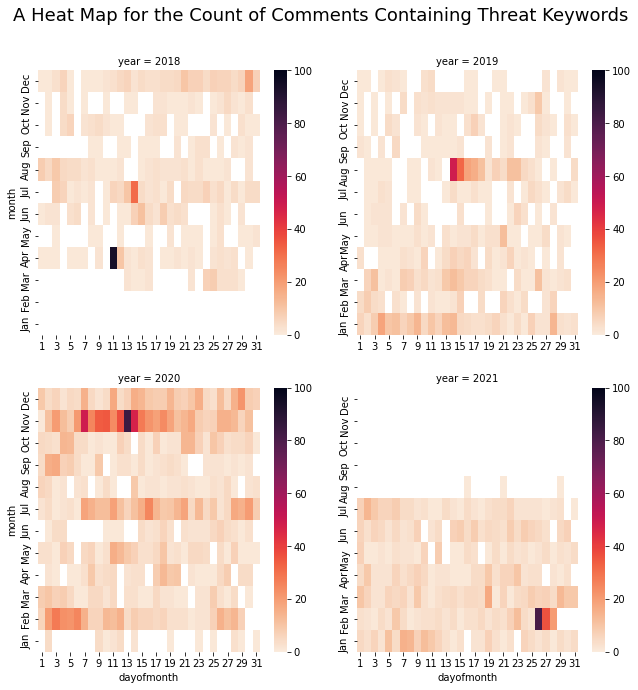

In [30]:
title = 'A Heat Map for the Count of Comments Containing Threat Keywords'
facet_heat(df_threat, title, n_col=2, vmax=100)

<a id='most_repeated'></a>
>>## Most Repeated Comments
> <ul>
 <li><a href="#heatmap">Heat Map</a></li>
 <li><a href="#most_repeated"><b>Most Repeated Comments</b></a></li>
 <li><a href="#top_users">Top Users Commented</a></li>
 <li><a href="#peak_dates">Peak Dates</a></li>
 <li><a href="#more">More Investigations</a></li>    
 </ul>

### Most Repeated Comments Containing Threat Keywords

In [81]:
df = df_threat.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(60)

,message,repeated_times,n_likes,n_replies
3143,kill amber,19,68.0,0.0
2105,die,15,19.0,0.0
3740,she deserves it,7,56.0,0.0
1747,"amber heard is a domestic abuser, an she don’t...",7,9.0,1.0
3294,logan's death,7,1.0,0.0
48,#lilycollins #lilyjanecollins #lilyjcollins #e...,6,0.0,0.0
1939,burn,6,9.0,0.0
2282,go to hell,6,4.0,1.0
3091,johnny deserves better,5,61.0,0.0
4628,🍀💫💕🍀🙏🍀💕💫🍀\ni'm so proud of johnny for how well...,5,20.0,1.0


In [80]:
df_threat.message.value_counts().head(60)

kill amber                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

<a id='top_users'></a>
>>## Top Users Commented
> <ul>
 <li><a href="#heatmap">Heat Map</a></li>
 <li><a href="#most_repeated">Most Repeated Comments</a></li>
 <li><a href="#top_users"><b>Top Users Commented</b></a></li>
 <li><a href="#peak_dates">Peak Dates</a></li>
 <li><a href="#more">More Investigations</a></li>    
 </ul>

### Top Users Commented with Threat Keywords

In [33]:
# The total number of different users Commented with Threat Keywords
df_threat.username.nunique()

4088

In [34]:
df_nthreat = df_threat.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nthreat.head(25)


,username,n_comments,n_likes,n_replies
3729,ticetm6,22,1.0,3.0
2487,mcukv,16,2.0,3.0
1413,fusco7134,14,2.0,0.0
1574,heard_addicted,14,30.0,12.0
2821,nveedmanzar,14,1.0,0.0
3416,slut_for_big_juicy_tacos,13,1.0,0.0
1016,dceubucteddy,11,19.0,4.0
3204,ryan_swift_bat13,11,56.0,0.0
2220,life_with_stacey,8,39.0,3.0
3474,ssarah_msr,8,11.0,2.0


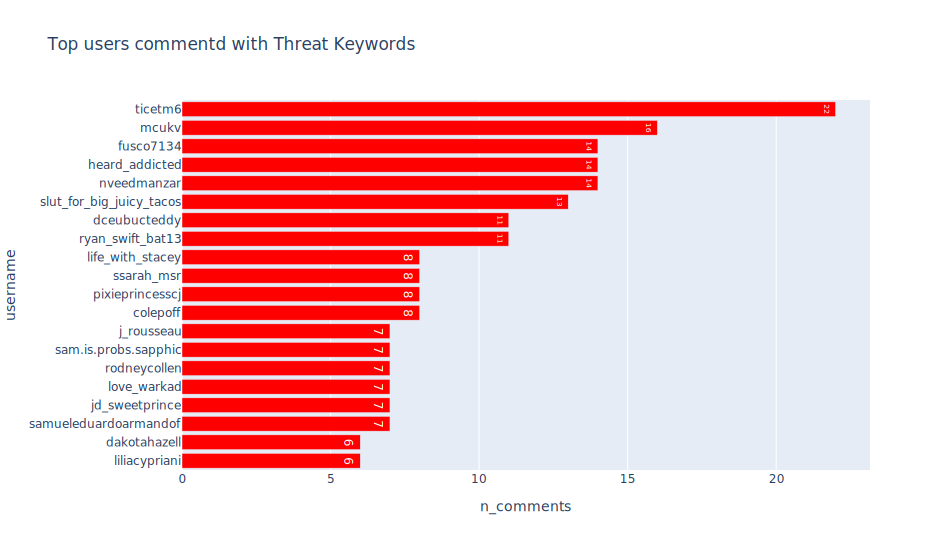

In [35]:
barh(
    df_nthreat[['username', 'n_comments']].head(20), 'Top users commentd with Threat Keywords', 0
)

### Threat Keywords Users Contributions on Each Date

In [36]:
df = df_threat.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
2892,2020-11-07,slut_for_big_juicy_tacos,12,0.0,0.0
2370,2020-07-20,life_with_stacey,8,39.0,3.0
3410,2020-12-07,ssarah_msr,8,11.0,2.0
1486,2019-11-26,samueleduardoarmandof,7,19.0,0.0
2085,2020-05-18,sam.is.probs.sapphic,7,1.0,0.0
1161,2019-06-23,j_rousseau,5,1.0,0.0
4005,2021-03-05,maia.ott,5,23.0,0.0
3568,2020-12-26,natalie_.27,5,5.0,0.0
2951,2020-11-10,alexx.146,5,0.0,0.0
3003,2020-11-12,_a_tired_ass_enby_,5,2.0,0.0


<a id='peak_dates'></a>
>>## Peak Dates
> <ul>
 <li><a href="#heatmap">Heat Map</a></li>
 <li><a href="#most_repeated">Most Repeated Comments</a></li>
 <li><a href="#top_users">Top Users Commented</a></li>
 <li><a href="#peak_dates"><b>Peak Dates</b></a></li>
 <li><a href="#more">More Investigations</a></li>    
 </ul>

### Threat Keywords Peak Dates

In [37]:
threat_dates = df_threat.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

threat_dates.head(15)


,date,n_comments,n_likes,n_replies
18,2018-04-11,94,28.0,5.0
733,2020-11-13,84,354.0,20.0
836,2021-02-26,81,548.0,3.0
377,2019-08-14,49,420.0,19.0
727,2020-11-07,49,1677.0,69.0
734,2020-11-14,47,56.0,1.0
732,2020-11-12,37,440.0,17.0
837,2021-02-27,36,19.0,2.0
730,2020-11-10,35,462.0,15.0
729,2020-11-09,34,365.0,1.0


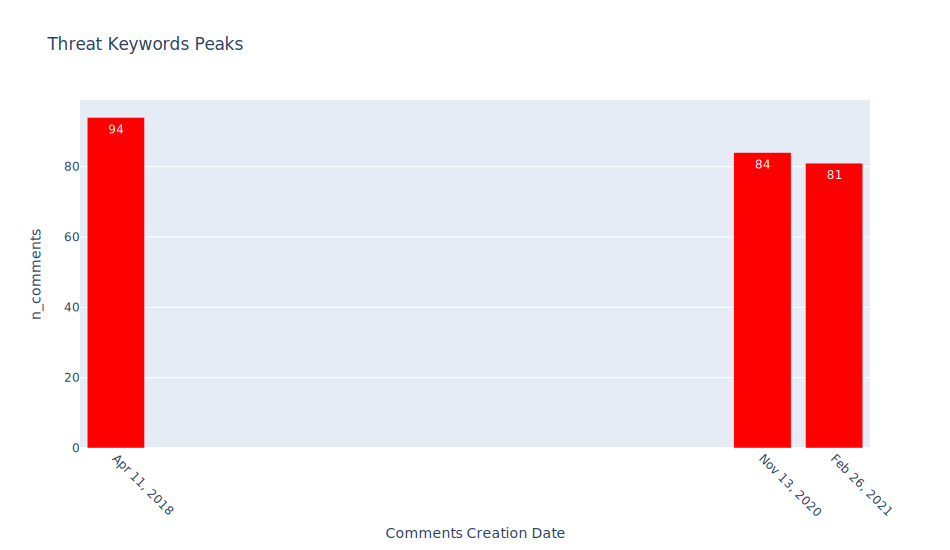

In [38]:
bar_peaks(threat_dates[['date', 'n_comments']].head(3), 'Threat Keywords Peaks')

<a id='more'></a>
>>## More Investigations
> <ul>
 <li><a href="#heatmap">Heat Map</a></li>
 <li><a href="#most_repeated">Most Repeated Comments</a></li>
 <li><a href="#top_users">Top Users Commented</b></a></li>
 <li><a href="#peak_dates">Peak Dates</li>
 <li><a href="#more"><b>More Investigations</a></a></li>    
 </ul>

### More Investigations on Top Users Commented with Threat Keywords

In [78]:
df_threat.username.value_counts().head(20)

ticetm6                     22
mcukv                       16
nveedmanzar                 14
heard_addicted              14
fusco7134                   14
slut_for_big_juicy_tacos    13
ryan_swift_bat13            11
dceubucteddy                11
pixieprincesscj              8
life_with_stacey             8
colepoff                     8
ssarah_msr                   8
samueleduardoarmandof        7
love_warkad                  7
j_rousseau                   7
jd_sweetprince               7
sam.is.probs.sapphic         7
rodneycollen                 7
dakotahazell                 6
mir_o_slav_71                6
Name: username, dtype: int64

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK